<b> Attribute information:</b>
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

#### Import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load data
sales = pd.read_csv('supermarket_sales.csv')

In [37]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [38]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



#### Q. Pertanyaan
Pada analisis data supermarket ini kita akan mencoba mencari insight yang ada pada tiap variabelnya seperti:
1. Bagaimana penjualan (count sales invoice) pada supermarket dan masing-masing cabang (Branch), berdasarkan jenis Kustomer (Customer type), dan jenis kelamin (Gender)?
2. Jumlah produk (Product line) yang terjual dan lihat juga untuk masing-masing cabang (Branch)
3. Bagaimana Trend penjualan (Quantity) harian (date) berdasarkan keseluruhan, berdasarkan cabang (Branch), berdasarkan product (production line), dan berdasarkan jenis Kustomer (Customer type)?
4. Bagaimana penjualan selama 24 jam? pada waktu (Time) kapan mayoritas pelanggan datang? cek juga untuk setiap cabangnya


In [39]:
sales.shape

(1000, 17)

In [40]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [41]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [42]:
sales.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [43]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [44]:
sales.describe(include = 'O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,651-88-7328,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


#### Ubah tipe data date dan time

In [46]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'])

In [159]:
sales['Hour'] = sales.Time.dt.hour

In [162]:
sales['hour_category'] = sales['Hour'].apply(lambda date: "Early Morning" if 3 <= date < 7 else "Morning" if 7 <= date < 11 
                                             else "Noon" if 11 <= date < 15 else "Evening" if 15 <= date < 19
                                             else "Night" if 19 <= date < 23 else "Midnight")

In [178]:
sales['hour_category'].value_counts()

Noon       365
Evening    346
Night      188
Morning    101
Name: hour_category, dtype: int64

#### Penjualan berdasarkan jenis kustomer

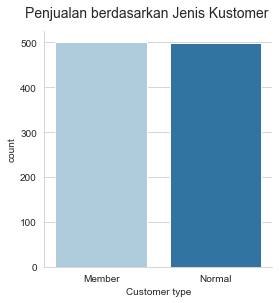

In [154]:
ax = sns.catplot(x="Customer type", data=sales, kind="count", height = 3.8, palette= "Paired")
ax.fig.suptitle("Penjualan berdasarkan Jenis Kustomer", y = 1.05, fontsize = 14);

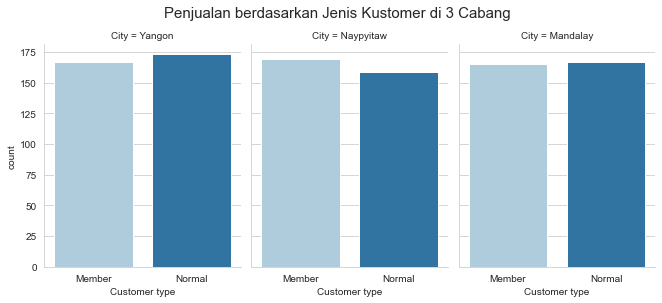

In [153]:
ax = sns.catplot(x="Customer type", data=sales, kind="count", col = 'City', height = 3.8, aspect = 0.8, palette="Paired")
ax.fig.suptitle("Penjualan berdasarkan Jenis Kustomer di 3 Cabang", y = 1.05, fontsize = 15);

#### Penjualan berdasarkan gender

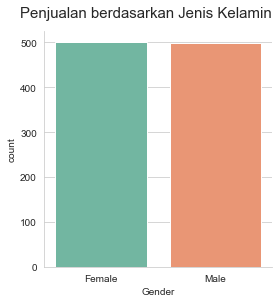

In [147]:
ax = sns.catplot(x="Gender", data=sales, kind="count", height = 3.8, palette ="Set2")
ax.fig.suptitle("Penjualan berdasarkan Jenis Kelamin", y = 1.05, fontsize = 15);

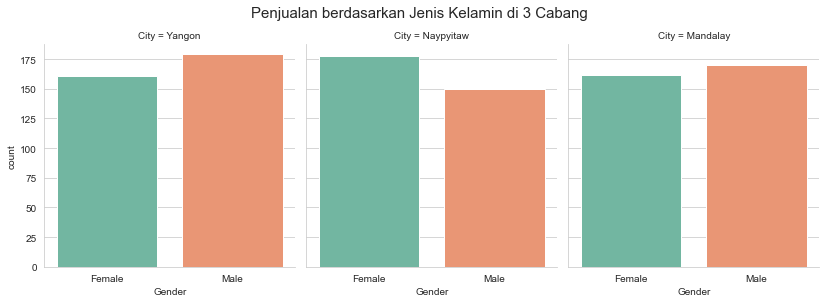

In [146]:
ax = sns.catplot(x="Gender", data=sales, kind="count", height = 3.8, col = 'City', palette ="Set2")
ax.fig.suptitle("Penjualan berdasarkan Jenis Kelamin di 3 Cabang", y = 1.05, fontsize = 15);

#### Penjualan tiap produk

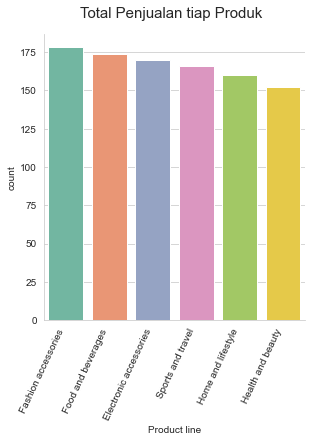

In [144]:
ax = sns.catplot(x="Product line", data=sales, kind="count", palette ="Set2", height = 4.5,
                order = sales['Product line'].value_counts().index)
ax.set_xticklabels(rotation=65, horizontalalignment='right')
ax.fig.suptitle("Total Penjualan tiap Produk", y = 1.05, fontsize = 15);

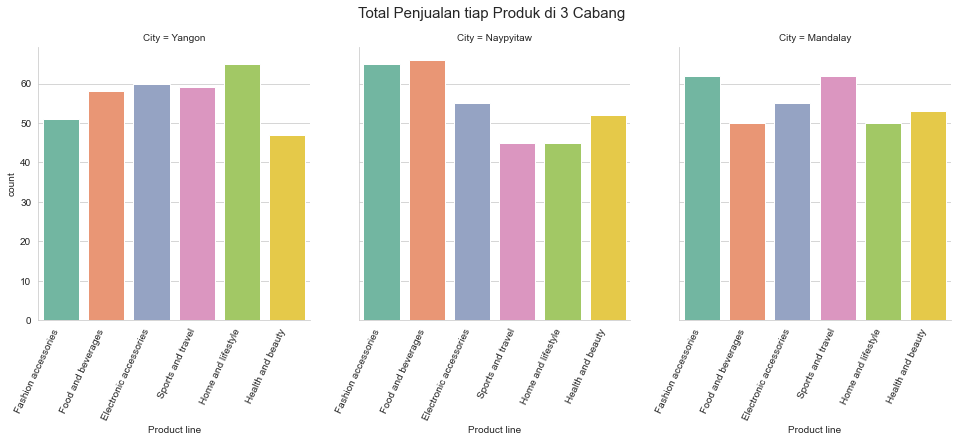

In [145]:
ax = sns.catplot(x="Product line", data=sales, kind="count", palette ="Set2", height = 4.5,
                order = sales['Product line'].value_counts().index, col = 'City')
ax.set_xticklabels(rotation=65, horizontalalignment='right')
ax.fig.suptitle("Total Penjualan tiap Produk di 3 Cabang", y = 1.05, fontsize = 15);

#### Penjualan tiap Produk berdasarkan jenis kelamin

In [202]:
sales_by_gender = sales.groupby(['Product line','Gender'], as_index = False)['Invoice ID'].count()
sales_by_gender

,Product line,Gender,Invoice ID
0,Electronic accessories,Female,84
1,Electronic accessories,Male,86
2,Fashion accessories,Female,96
3,Fashion accessories,Male,82
4,Food and beverages,Female,90
5,Food and beverages,Male,84
6,Health and beauty,Female,64
7,Health and beauty,Male,88
8,Home and lifestyle,Female,79
9,Home and lifestyle,Male,81


In [218]:
sales_by_gender = sales_by_gender.rename(columns={'Invoice ID': 'Sales Count'})
sales_by_gender = sales_by_gender.sort_values(['Gender','Sales Count'])

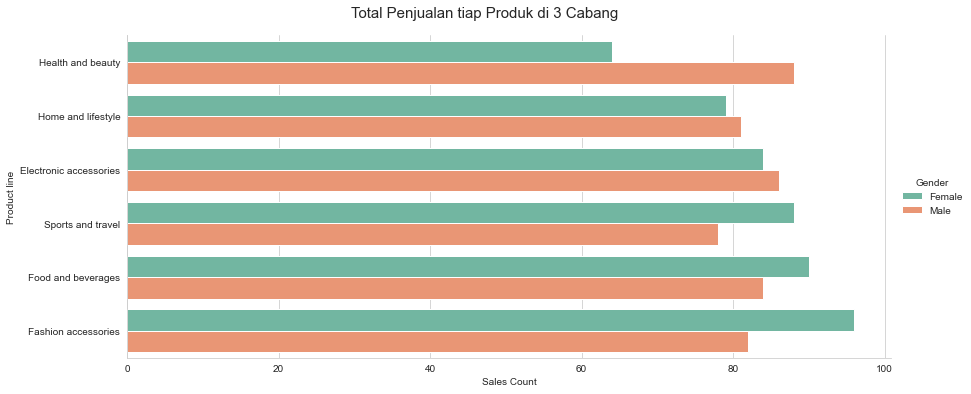

In [219]:
ax = sns.catplot(x="Sales Count", y = 'Product line', data=sales_by_gender, kind="bar", palette ="Set2", aspect=2.5,
                hue = 'Gender')
ax.fig.suptitle("Total Penjualan tiap Produk di 3 Cabang", y = 1.05, fontsize = 15);

### Trend penjualan

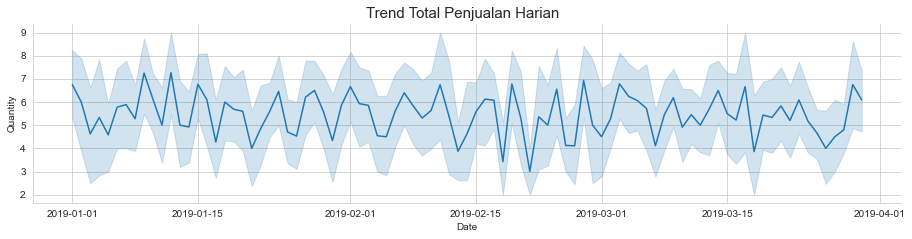

In [131]:
g = sns.relplot(x="Date", y="Quantity", kind="line", data=sales, height=3, aspect=4.2)
g.fig.suptitle("Trend Total Penjualan Harian", y = 1.03, fontsize = 15);

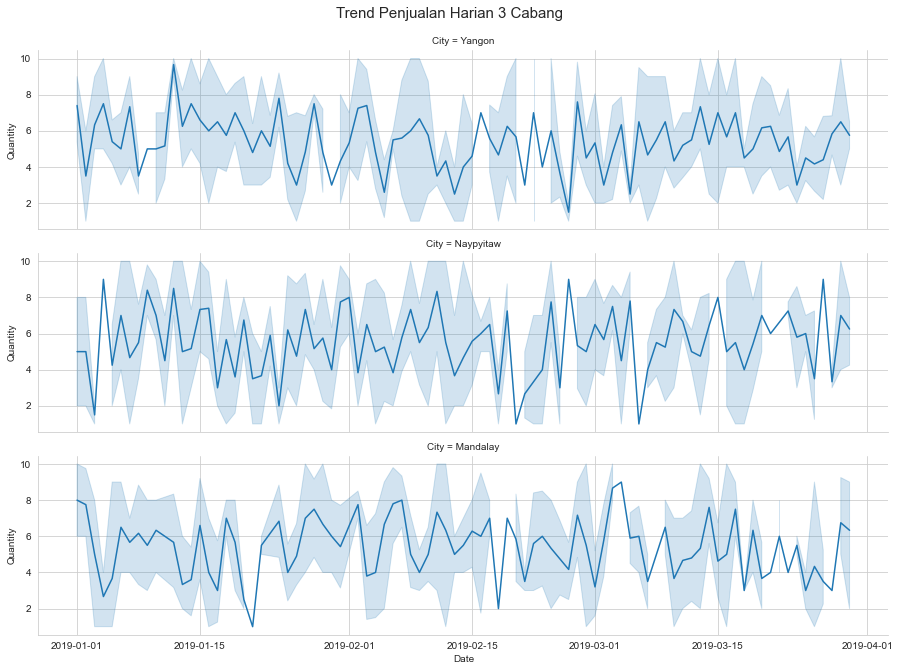

In [129]:
g = sns.FacetGrid(sales, row="City", height=3, aspect=4.2)
g.map(sns.lineplot, 'Date', 'Quantity')
g.fig.suptitle("Trend Penjualan Harian 3 Cabang", y = 1.03, fontsize = 15);

#### Trend penjualan berdasarkan produk

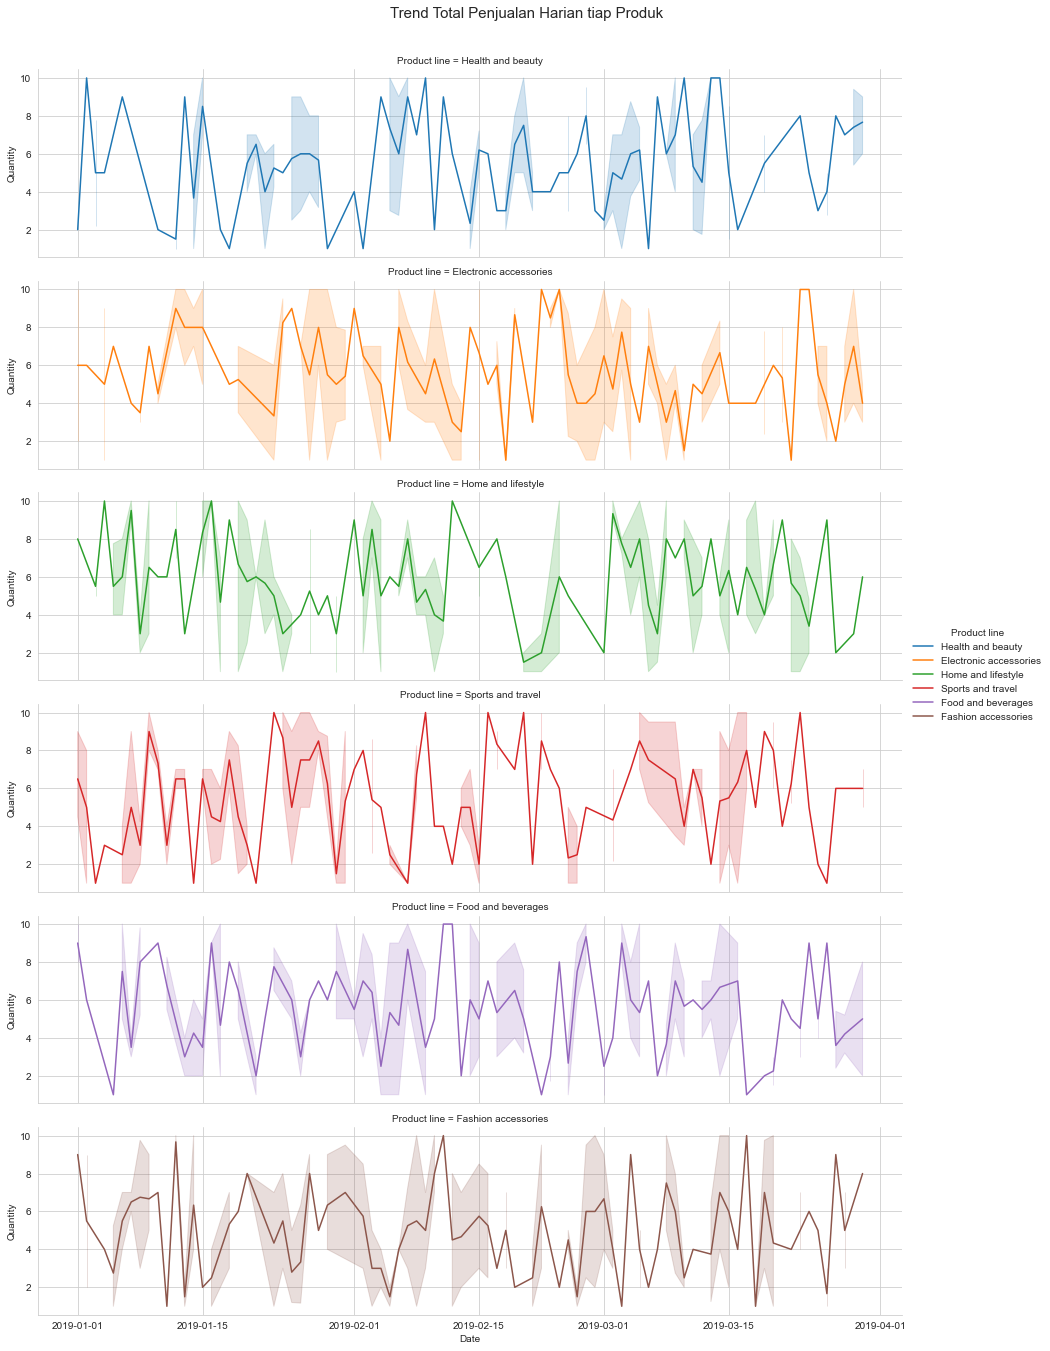

In [156]:
ax = sns.relplot(x="Date", y="Quantity", kind="line", data=sales, row = 'Product line', height=3, aspect=4.2, hue = 'Product line')
ax.fig.suptitle("Trend Total Penjualan Harian tiap Produk", y = 1.03, fontsize = 15);

#### Trend Penjualan tiap tipe kustomer

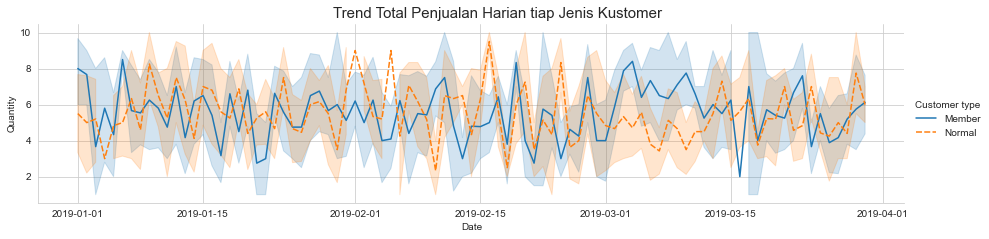

In [155]:
ax = sns.relplot(x="Date", y="Quantity", kind="line", data=sales, hue = 'Customer type', height=3, aspect=4.2, style = 'Customer type')
ax.fig.suptitle("Trend Total Penjualan Harian tiap Jenis Kustomer", y = 1.03, fontsize = 15);

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,hour_category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-03-12 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Noon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-03-12 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-03-12 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Noon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-03-12 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Night
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-03-12 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-03-12 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13,Noon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-03-12 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17,Evening
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-03-12 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13,Noon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-03-12 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15,Evening


#### Penjualan berdasarkan categori jam

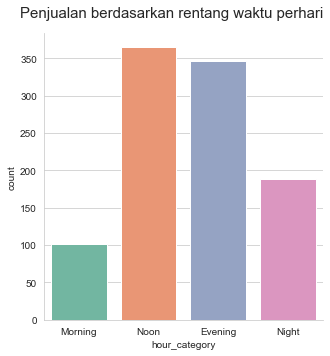

In [193]:
ax = sns.catplot(x = 'hour_category', data = sales, kind = 'count', palette ="Set2", height = 4.5, order = ['Morning', 'Noon', 'Evening', 'Night'])
ax.fig.suptitle("Penjualan berdasarkan rentang waktu perhari", y = 1.05, fontsize = 15);